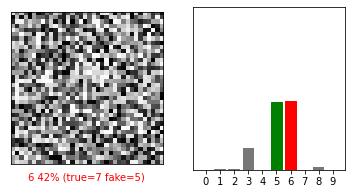

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from MorphEnv import MorphEnv
from os.path import exists
from tensorflow.keras import datasets, layers, models
from stable_baselines3 import PPO, TD3
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.noise import NormalActionNoise

model_victim = models.load_model('mnist')

img = cv2.resize(cv2.imread("Original.png", 0), (36, 36)).reshape(36, 36, 1)
img_label = 7
outcome = 5

env = MorphEnv(model_victim, img, img_label, outcome)
model_name = "MorphPPO.zip"

policy_name = "CnnPolicy"
n_timesteps = 1000
n_steps = 128

model_attack = PPO(policy_name, env, n_steps=n_steps, verbose=0)

done = False
while not done:
    model_attack.learn(n_timesteps)
    model_attack.save(model_name)
    keep_training = input("Do you want to continue? [Y/N]: ")
    if keep_training not in "yY":
        done = True